
# DEAM Dataset Exploratory Data Analysis (EDA)

This notebook provides a comprehensive exploration of the DEAM (Database for Emotion Analysis in Music) dataset.

The dataset contains audio features, emotion annotations, and audio files for music emotion recognition.

### Dataset Structure:

Note: Data is not saved in this repository.

- /data/features/: Frame-level audio features (CSV files)
- /data/annotations/: Emotion annotations (valence/arousal)
- /data/MEMD_audio/: Audio files (MP3 format)


In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

# 1. Dataset Overview

In [ ]:
# 1. DATASET OVERVIEW
print("\n1. DATASET OVERVIEW")
print("-" * 30)

# Check data directory structure
data_dir = Path("data")
features_dir = data_dir / "features"
annotations_dir = data_dir / "annotations"
audio_dir = data_dir / "MEMD_audio"

print(f"Data directory: {data_dir}")
print(f"Features directory: {features_dir}")
print(f"Annotations directory: {annotations_dir}")
print(f"Audio directory: {audio_dir}")

# Count files in each directory
feature_files = list(features_dir.glob("*.csv"))
annotation_files = list(annotations_dir.rglob("*.csv"))
audio_files = list(audio_dir.glob("*.mp3"))

print(f"\nNumber of feature files: {len(feature_files)}")
print(f"Number of annotation files: {len(annotation_files)}")
print(f"Number of audio files: {len(audio_files)}")


1. DATASET OVERVIEW
------------------------------
Data directory: data
Features directory: data/features
Annotations directory: data/annotations
Audio directory: data/MEMD_audio

Number of feature files: 1802
Number of annotation files: 3610
Number of audio files: 1802


# 2. Explore Feature Files

In [25]:
# 2. EXPLORE FEATURE FILES
print("\n\n2. EXPLORE FEATURE FILES")
print("-" * 30)

# Load a sample feature file to understand structure
sample_feature_file = feature_files[0]
print(f"Sample feature file: {sample_feature_file.name}")

# Read the first few lines to understand structure
with open(sample_feature_file, 'r') as f:
    header = f.readline().strip()
    first_data_line = f.readline().strip()

print(f"Header (first 200 chars): {header[:200]}...")
print(f"First data line (first 200 chars): {first_data_line[:200]}...")

# Parse the header to get feature names
feature_names = header.split(';')
print(f"\nNumber of features: {len(feature_names)}")
print(f"First 10 features: {feature_names[:10]}")

# Load a small sample of the feature data
try:
    # Read first 1000 rows to understand data structure
    sample_features = pd.read_csv(sample_feature_file, sep=';', nrows=1000)
    print(f"\nFeature data shape: {sample_features.shape}")
    print(f"Feature data types:\n{sample_features.dtypes.value_counts()}")
    
    # Show basic statistics
    print(f"\nBasic statistics of first 5 features:")
    print(sample_features.iloc[:, :5].describe())
    
except Exception as e:
    print(f"Error reading feature file: {e}")



2. EXPLORE FEATURE FILES
------------------------------
Sample feature file: 223.csv
Header (first 200 chars): frameTime;F0final_sma_stddev;F0final_sma_amean;voicingFinalUnclipped_sma_stddev;voicingFinalUnclipped_sma_amean;jitterLocal_sma_stddev;jitterLocal_sma_amean;jitterDDP_sma_stddev;jitterDDP_sma_amean;sh...
First data line (first 200 chars): 0.000000;0;0;0;0;0;0;0;0;0;0;0;-100;1.895202e-04;8.600770e-03;1.686621e-02;9.930646e-01;3.912231e-07;1.927613e-05;8.783982e-03;6.775132e-01;1.724399e-02;1.316196e-01;4.567047e-02;2.764005e-01;6.696310...

Number of features: 261
First 10 features: ['frameTime', 'F0final_sma_stddev', 'F0final_sma_amean', 'voicingFinalUnclipped_sma_stddev', 'voicingFinalUnclipped_sma_amean', 'jitterLocal_sma_stddev', 'jitterLocal_sma_amean', 'jitterDDP_sma_stddev', 'jitterDDP_sma_amean', 'shimmerLocal_sma_stddev']

Feature data shape: (182, 261)
Feature data types:
float64    261
Name: count, dtype: int64

Basic statistics of first 5 features:
        frameTi

# 3. Explore Annotations

In [26]:
# 3. EXPLORE ANNOTATIONS
print("\n\n3. EXPLORE ANNOTATIONS")
print("-" * 30)

# Find annotation files
song_level_annotations = list(annotations_dir.glob("**/song_level/*.csv"))
dynamic_annotations = list(annotations_dir.glob("**/dynamic*/valence.csv"))

print(f"Song-level annotation files: {len(song_level_annotations)}")
print(f"Dynamic annotation files: {len(dynamic_annotations)}")

# Load song-level annotations
if song_level_annotations:
    song_annotations = pd.read_csv(song_level_annotations[0])
    print(f"\nSong-level annotations shape: {song_annotations.shape}")
    print(f"Song-level annotations columns: {song_annotations.columns.tolist()}")
    print(f"\nFirst 10 song-level annotations:")
    print(song_annotations.head(10))
    
    # Basic statistics of annotations
    print(f"\nAnnotation statistics:")
    print(song_annotations.describe())

# Load dynamic annotations (valence)
if dynamic_annotations:
    valence_annotations = pd.read_csv(dynamic_annotations[0])
    print(f"\nDynamic valence annotations shape: {valence_annotations.shape}")
    print(f"Dynamic valence columns (first 10): {valence_annotations.columns[:10].tolist()}")
    
    # Show sample of dynamic annotations
    print(f"\nSample dynamic valence data (first 5 songs, first 10 time points):")
    sample_dynamic = valence_annotations.iloc[:5, :11]
    print(sample_dynamic)



3. EXPLORE ANNOTATIONS
------------------------------
Song-level annotation files: 4
Dynamic annotation files: 1

Song-level annotations shape: (1744, 5)
Song-level annotations columns: ['song_id', ' valence_mean', ' valence_std', ' arousal_mean', ' arousal_std']

First 10 song-level annotations:
   song_id   valence_mean   valence_std   arousal_mean   arousal_std
0        2            3.1          0.94            3.0          0.63
1        3            3.5          1.75            3.3          1.62
2        4            5.7          1.42            5.5          1.63
3        5            4.4          2.01            5.3          1.85
4        7            5.8          1.47            6.4          1.69
5        8            3.2          1.40            4.8          1.54
6       10            4.0          1.67            4.7          1.85
7       12            5.5          1.91            5.8          1.89
8       13            3.2          1.40            4.0          1.67
9       17

# 4. Data Visualization

In [27]:
song_annotations.head()

,song_id,valence_mean,valence_std,arousal_mean,arousal_std
0,2,3.1,0.94,3.0,0.63
1,3,3.5,1.75,3.3,1.62
2,4,5.7,1.42,5.5,1.63
3,5,4.4,2.01,5.3,1.85
4,7,5.8,1.47,6.4,1.69


In [28]:
print(f"Song-level annotations columns: {song_annotations.columns.tolist()}")
print(f"Song-level annotations shape: {song_annotations.shape}")
print(f"Song-level annotations song_id: {song_annotations['song_id']}")
print(f"Song-level annotations arousal_mean: {song_annotations[' arousal_mean']}")

Song-level annotations columns: ['song_id', ' valence_mean', ' valence_std', ' arousal_mean', ' arousal_std']
Song-level annotations shape: (1744, 5)
Song-level annotations song_id: 0          2
1          3
2          4
3          5
4          7
        ... 
1739    1996
1740    1997
1741    1998
1742    1999
1743    2000
Name: song_id, Length: 1744, dtype: int64
Song-level annotations arousal_mean: 0       3.0
1       3.3
2       5.5
3       5.3
4       6.4
       ... 
1739    5.9
1740    3.9
1741    6.2
1742    5.4
1743    6.0
Name:  arousal_mean, Length: 1744, dtype: float64




4. DATA VISUALIZATION
------------------------------


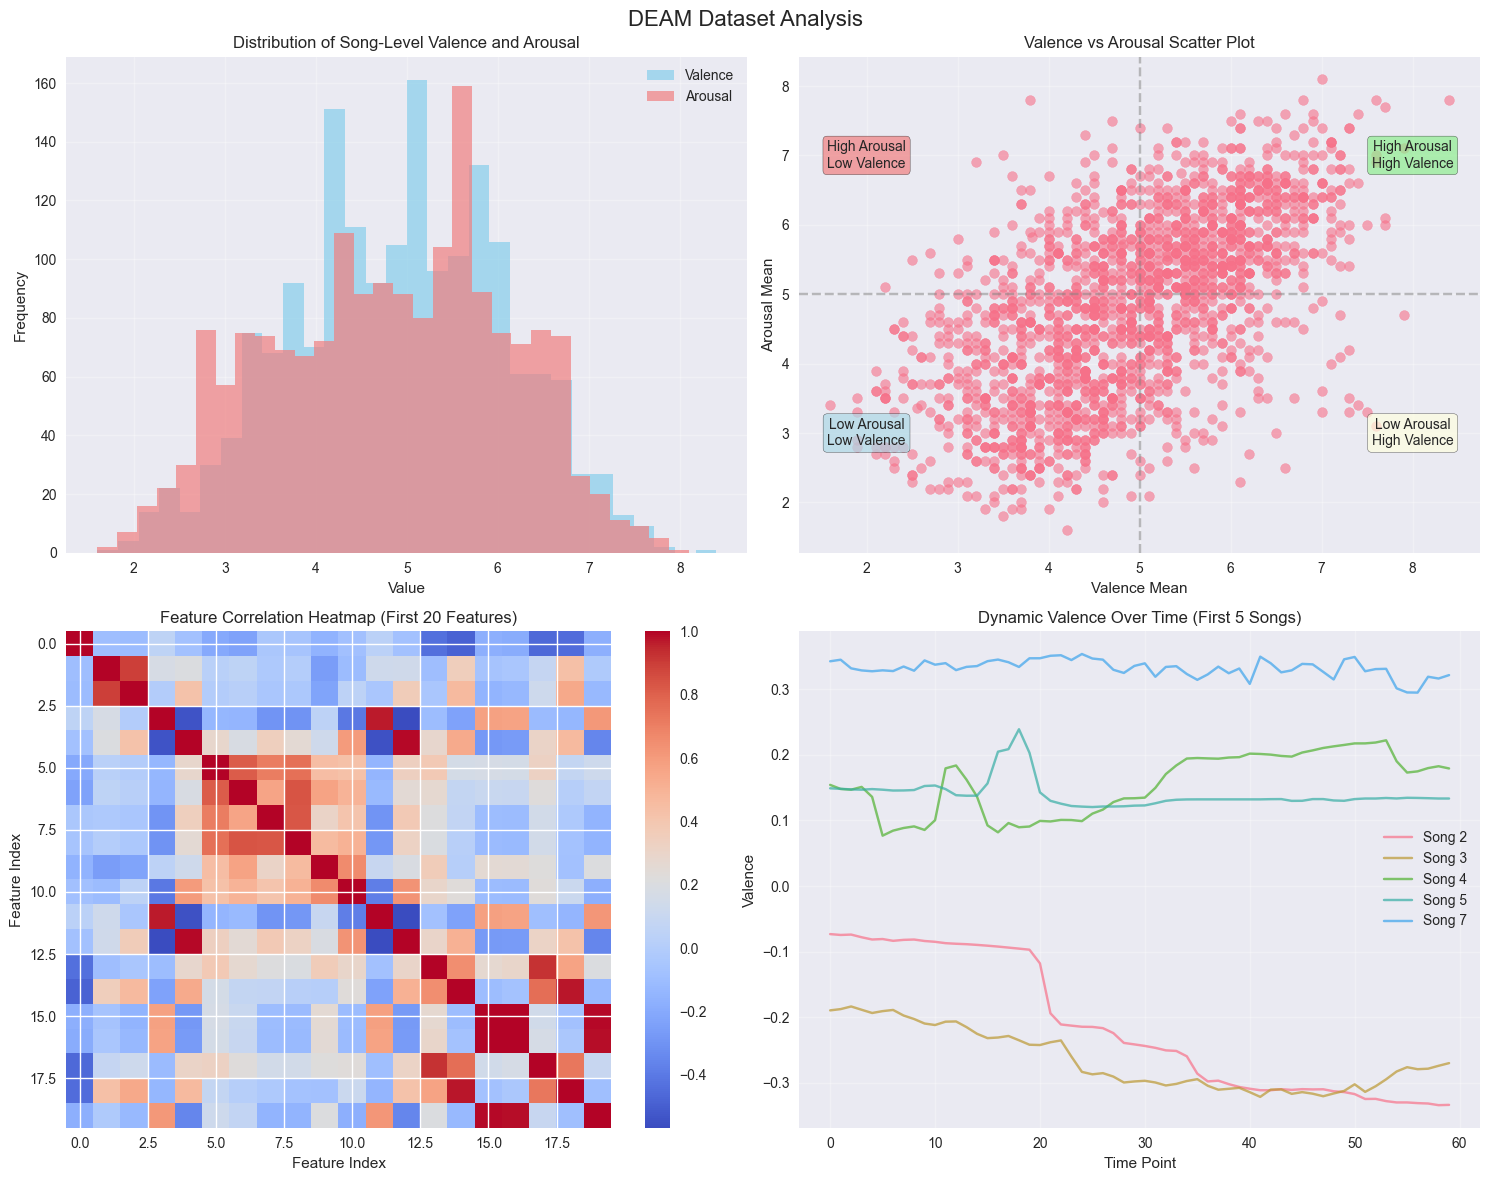

In [29]:
# 4. DATA VISUALIZATION
print("\n\n4. DATA VISUALIZATION")
print("-" * 30)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('DEAM Dataset Analysis', fontsize=16)

# 1. Distribution of song-level valence and arousal
if song_level_annotations:
    ax1 = axes[0, 0]
    ax1.hist(song_annotations[' valence_mean'], bins=30, alpha=0.7, label='Valence', color='skyblue')
    ax1.hist(song_annotations[' arousal_mean'], bins=30, alpha=0.7, label='Arousal', color='lightcoral')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Song-Level Valence and Arousal')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

# 2. Valence vs Arousal scatter plot
if song_level_annotations:
    ax2 = axes[0, 1]
    scatter = ax2.scatter(song_annotations[' valence_mean'], song_annotations[' arousal_mean'], 
                          alpha=0.6, s=50)
    ax2.set_xlabel('Valence Mean')
    ax2.set_ylabel('Arousal Mean')
    ax2.set_title('Valence vs Arousal Scatter Plot')
    ax2.grid(True, alpha=0.3)
    
    # Add quadrant lines
    ax2.axhline(y=5, color='gray', linestyle='--', alpha=0.5)
    ax2.axvline(x=5, color='gray', linestyle='--', alpha=0.5)
    
    # Add quadrant labels
    ax2.text(2, 7, 'High Arousal\nLow Valence', ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    ax2.text(8, 7, 'High Arousal\nHigh Valence', ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
    ax2.text(2, 3, 'Low Arousal\nLow Valence', ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    ax2.text(8, 3, 'Low Arousal\nHigh Valence', ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))

# 3. Feature correlation heatmap (if we have feature data)
if 'sample_features' in locals():
    ax3 = axes[1, 0]
    # Select numeric columns and compute correlation
    numeric_features = sample_features.select_dtypes(include=[np.number])
    if numeric_features.shape[1] > 1:
        # Take first 20 features for visualization
        corr_matrix = numeric_features.iloc[:, :20].corr()
        im = ax3.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
        ax3.set_title('Feature Correlation Heatmap (First 20 Features)')
        ax3.set_xlabel('Feature Index')
        ax3.set_ylabel('Feature Index')
        plt.colorbar(im, ax=ax3)

# 4. Time series of dynamic annotations (if available)
if dynamic_annotations:
    ax4 = axes[1, 1]
    # Plot first 5 songs' valence over time
    time_points = range(len(valence_annotations.columns) - 1)  # Exclude song_id column
    
    for i in range(min(5, len(valence_annotations))):
        song_data = valence_annotations.iloc[i, 1:].values  # Exclude song_id
        ax4.plot(time_points, song_data, alpha=0.7, label=f'Song {valence_annotations.iloc[i, 0]}')
    
    ax4.set_xlabel('Time Point')
    ax4.set_ylabel('Valence')
    ax4.set_title('Dynamic Valence Over Time (First 5 Songs)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Feature Analysis

In [30]:
# 5. FEATURE ANALYSIS
print("\n\n5. FEATURE ANALYSIS")
print("-" * 30)

if 'sample_features' in locals():
    # Analyze feature distributions
    print("Feature Analysis:")
    print(f"Total number of features: {len(feature_names)}")
    
    # Categorize features
    pitch_features = [f for f in feature_names if 'F0' in f or 'pitch' in f.lower()]
    energy_features = [f for f in feature_names if 'energy' in f.lower() or 'RMS' in f.lower()]
    mfcc_features = [f for f in feature_names if 'mfcc' in f.lower()]
    spectral_features = [f for f in feature_names if 'spectral' in f.lower()]
    
    print(f"Pitch-related features: {len(pitch_features)}")
    print(f"Energy-related features: {len(energy_features)}")
    print(f"MFCC features: {len(mfcc_features)}")
    print(f"Spectral features: {len(spectral_features)}")
    
    # Show sample feature names for each category
    if pitch_features:
        print(f"Sample pitch features: {pitch_features[:3]}")
    if energy_features:
        print(f"Sample energy features: {energy_features[:3]}")
    if mfcc_features:
        print(f"Sample MFCC features: {mfcc_features[:3]}")
    if spectral_features:
        print(f"Sample spectral features: {spectral_features[:3]}")



5. FEATURE ANALYSIS
------------------------------
Feature Analysis:
Total number of features: 261
Pitch-related features: 4
Energy-related features: 4
MFCC features: 56
Spectral features: 48
Sample pitch features: ['F0final_sma_stddev', 'F0final_sma_amean', 'F0final_sma_de_stddev']
Sample energy features: ['pcm_RMSenergy_sma_stddev', 'pcm_RMSenergy_sma_amean', 'pcm_RMSenergy_sma_de_stddev']
Sample MFCC features: ['pcm_fftMag_mfcc_sma[1]_stddev', 'pcm_fftMag_mfcc_sma[1]_amean', 'pcm_fftMag_mfcc_sma[2]_stddev']
Sample spectral features: ['pcm_fftMag_spectralRollOff25.0_sma_stddev', 'pcm_fftMag_spectralRollOff25.0_sma_amean', 'pcm_fftMag_spectralRollOff50.0_sma_stddev']


# 6. Annotation Analysis

In [31]:
# 6. ANNOTATION ANALYSIS
print("\n\n6. ANNOTATION ANALYSIS")
print("-" * 30)

if song_level_annotations:
    print("Annotation Analysis:")
    
    # Valence analysis
    valence_stats = song_annotations[' valence_mean'].describe()
    print(f"\nValence Statistics:")
    print(f"Mean: {valence_stats['mean']:.3f}")
    print(f"Std: {valence_stats['std']:.3f}")
    print(f"Min: {valence_stats['min']:.3f}")
    print(f"Max: {valence_stats['max']:.3f}")
    
    # Arousal analysis
    arousal_stats = song_annotations[' arousal_mean'].describe()
    print(f"\nArousal Statistics:")
    print(f"Mean: {arousal_stats['mean']:.3f}")
    print(f"Std: {arousal_stats['std']:.3f}")
    print(f"Min: {arousal_stats['min']:.3f}")
    print(f"Max: {arousal_stats['max']:.3f}")
    
    # Correlation between valence and arousal
    correlation = song_annotations[' valence_mean'].corr(song_annotations[' arousal_mean'])
    print(f"\nCorrelation between valence and arousal: {correlation:.3f}")
    
    # Count songs in each quadrant
    high_valence = song_annotations[' valence_mean'] > 5
    high_arousal = song_annotations[' arousal_mean'] > 5
    
    quadrant_counts = {
        'High Valence, High Arousal': (high_valence & high_arousal).sum(),
        'High Valence, Low Arousal': (high_valence & ~high_arousal).sum(),
        'Low Valence, High Arousal': (~high_valence & high_arousal).sum(),
        'Low Valence, Low Arousal': (~high_valence & ~high_arousal).sum()
    }
    
    print(f"\nSongs in each quadrant:")
    for quadrant, count in quadrant_counts.items():
        print(f"{quadrant}: {count}")



6. ANNOTATION ANALYSIS
------------------------------
Annotation Analysis:

Valence Statistics:
Mean: 4.903
Std: 1.174
Min: 1.600
Max: 8.400

Arousal Statistics:
Mean: 4.813
Std: 1.289
Min: 1.600
Max: 8.100

Correlation between valence and arousal: 0.588

Songs in each quadrant:
High Valence, High Arousal: 583
High Valence, Low Arousal: 221
Low Valence, High Arousal: 217
Low Valence, Low Arousal: 723


# 7. Data Quality Assessment

In [32]:
# 7. DATA QUALITY ASSESSMENT
print("\n\n7. DATA QUALITY ASSESSMENT")
print("-" * 30)

print("Data Quality Assessment:")

# Check for missing values in annotations
if song_level_annotations:
    missing_annotations = song_annotations.isnull().sum()
    print(f"\nMissing values in song-level annotations:")
    print(missing_annotations)
    
    # Check for duplicate song IDs
    duplicate_songs = song_annotations['song_id'].duplicated().sum()
    print(f"\nDuplicate song IDs: {duplicate_songs}")

# Check feature file sizes and consistency
if feature_files:
    file_sizes = [f.stat().st_size for f in feature_files]
    print(f"\nFeature file sizes:")
    print(f"Min size: {min(file_sizes)} bytes")
    print(f"Max size: {max(file_sizes)} bytes")
    print(f"Mean size: {np.mean(file_sizes):.0f} bytes")
    
    # Check if all feature files have the same number of features
    feature_counts = []
    for f in feature_files[:10]:  # Check first 10 files
        try:
            with open(f, 'r') as file:
                header = file.readline().strip()
                feature_counts.append(len(header.split(';')))
        except:
            continue
    
    if feature_counts:
        print(f"\nFeature counts in first 10 files:")
        print(f"Min features: {min(feature_counts)}")
        print(f"Max features: {max(feature_counts)}")
        print(f"Consistent feature count: {min(feature_counts) == max(feature_counts)}")



7. DATA QUALITY ASSESSMENT
------------------------------
Data Quality Assessment:

Missing values in song-level annotations:
song_id          0
 valence_mean    0
 valence_std     0
 arousal_mean    0
 arousal_std     0
dtype: int64

Duplicate song IDs: 0

Feature file sizes:
Min size: 304966 bytes
Max size: 4304530 bytes
Mean size: 877526 bytes

Feature counts in first 10 files:
Min features: 261
Max features: 261
Consistent feature count: True


# 8. Summary and Insights

In [33]:
# 8. SUMMARY AND INSIGHTS
print("\n\n8. SUMMARY AND INSIGHTS")
print("-" * 30)

print("Dataset Summary:")
print(f"- Total songs: {len(feature_files)}")
print(f"- Audio features per song: {len(feature_names) if 'feature_names' in locals() else 'Unknown'}")
print(f"- Annotation type: Valence-Arousal model")
print(f"- Temporal resolution: Per-second annotations available")
print(f"- Audio format: MP3 files")

print("\nKey Insights:")
print("1. The dataset uses the Valence-Arousal emotion model, which is a 2D circular model")
print("2. Features include low-level audio descriptors (MFCCs, pitch, energy, spectral features)")
print("3. Both static (song-level) and dynamic (time-varying) annotations are available")
print("4. The dataset appears to be well-structured with consistent feature extraction")

print("\nPotential Use Cases:")
print("1. Music Emotion Recognition (MER)")
print("2. Affective Computing Research")
print("3. Music Information Retrieval")
print("4. Human-Computer Interaction")
print("5. Machine Learning for Audio Analysis")

print("\nNext Steps:")
print("1. Load and preprocess specific feature subsets")
print("2. Implement feature normalization and selection")
print("3. Build emotion prediction models")
print("4. Analyze temporal patterns in emotions")
print("5. Cross-validate with different feature combinations")

print("\n" + "=" * 50)
print("EDA Complete!")



8. SUMMARY AND INSIGHTS
------------------------------
Dataset Summary:
- Total songs: 1802
- Audio features per song: 261
- Annotation type: Valence-Arousal model
- Temporal resolution: Per-second annotations available
- Audio format: MP3 files

Key Insights:
1. The dataset uses the Valence-Arousal emotion model, which is a 2D circular model
2. Features include low-level audio descriptors (MFCCs, pitch, energy, spectral features)
3. Both static (song-level) and dynamic (time-varying) annotations are available
4. The dataset appears to be well-structured with consistent feature extraction

Potential Use Cases:
1. Music Emotion Recognition (MER)
2. Affective Computing Research
3. Music Information Retrieval
4. Human-Computer Interaction
5. Machine Learning for Audio Analysis

Next Steps:
1. Load and preprocess specific feature subsets
2. Implement feature normalization and selection
3. Build emotion prediction models
4. Analyze temporal patterns in emotions
5. Cross-validate with diff